<a href="https://colab.research.google.com/github/megnidio/DPR/blob/main/Fishidentifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statistics
import scipy.stats
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [ ]:
df_fishidentified = pd.read_csv('/content/sample_data/FishIdentifiedFullDetailsData - FishFullDataDetails1.csv')
df_fishidentified.head(10)

,FEATURE_ID,taxonomy,SampleID,value,Alias,SiteEchantillonnage,Longitude(X),Latitude(Y),TypeEchantillon,Color,Treatment,k,p,c,o,f,g
0,1,k__Eukaryota;p__Chordata;c__Mammalia;o__Primat...,MI.M05812_0023.001.FLD0193.1-1-G-a_MiFish,808,1.1.G.a,Montee.Robert,-7.325461e+09,4.550600e+09,Biologique,1,Ecole.Secondaire.Andre-Laurendeau_Riviere.Rich...,Eukaryota,Chordata,Mammalia,Primates,Hominidae,Homo
1,1,k__Eukaryota;p__Chordata;c__Mammalia;o__Primat...,MI.M05812_0023.001.FLD0194.2-1-H-a_MiFish,0,2.1.H.a,Les.ecluses,-7.328332e+09,4.544692e+09,Biologique,1,Ecole.secondaire.de.Chambly_Bassin.de.Chambly_...,Eukaryota,Chordata,Mammalia,Primates,Hominidae,Homo
2,1,k__Eukaryota;p__Chordata;c__Mammalia;o__Primat...,MI.M05812_0023.001.FLD0195.2-2-H-b_MiFish,0,2.2.H.b,Fort.de.Chambly,-7.327713e+08,4.544974e+09,Biologique,1,Ecole.secondaire.de.Chambly_Bassin.de.Chambly_...,Eukaryota,Chordata,Mammalia,Primates,Hominidae,Homo
3,1,k__Eukaryota;p__Chordata;c__Mammalia;o__Primat...,MI.M05812_0023.001.FLD0196.2-3-H-c_MiFish,0,2.3.H.c,Le.Parc.Martel,-7.329023e+09,4.544958e+09,Biologique,1,Ecole.secondaire.de.Chambly_Bassin.de.Chambly_...,Eukaryota,Chordata,Mammalia,Primates,Hominidae,Homo
4,1,k__Eukaryota;p__Chordata;c__Mammalia;o__Primat...,MI.M05812_0023.001.FLD0197.4-1-E-a_MiFish,0,4.1.E.a,"Vieux-Port,.la.promenade",-7.355277e+09,4.550154e+09,Biologique,1,College.Ville-Marie_Fleuve.St-Laurent_Vieux-Po...,Eukaryota,Chordata,Mammalia,Primates,Hominidae,Homo
5,1,k__Eukaryota;p__Chordata;c__Mammalia;o__Primat...,MI.M05812_0023.001.FLD0198.4-2-E-b_MiFish,0,4.2.E.b,"Vieux-Port,.le.pont",-7.354977e+09,4.550846e+09,Biologique,1,College.Ville-Marie_Fleuve.St-Laurent_Vieux-Po...,Eukaryota,Chordata,Mammalia,Primates,Hominidae,Homo
6,1,k__Eukaryota;p__Chordata;c__Mammalia;o__Primat...,MI.M05812_0023.001.FLD0199.4-3-E-c_MiFish,96,4.3.E.c,"Vieux-port,.la.descente",-7.354843e+09,4.551257e+09,Biologique,1,College.Ville-Marie_Fleuve.St-Laurent_Vieux-po...,Eukaryota,Chordata,Mammalia,Primates,Hominidae,Homo
7,1,k__Eukaryota;p__Chordata;c__Mammalia;o__Primat...,MI.M05812_0023.001.FLD0200.5-1-D-a_MiFish,8,5.1.D.a,Berge.des.Baigneurs,-7.378611e+09,4.561879e+09,Biologique,1,Ecole.secondaire.Cure-Labelle_Riviere.des.Mill...,Eukaryota,Chordata,Mammalia,Primates,Hominidae,Homo
8,1,k__Eukaryota;p__Chordata;c__Mammalia;o__Primat...,MI.M05812_0023.001.FLD0201.5-2-D-b_MiFish,0,5.2.D.b,Parc.de.la.Fabrique,-7.378807e+09,4.561472e+09,Biologique,1,Ecole.secondaire.Cure-Labelle_Riviere.des.Mill...,Eukaryota,Chordata,Mammalia,Primates,Hominidae,Homo
9,1,k__Eukaryota;p__Chordata;c__Mammalia;o__Primat...,MI.M05812_0023.001.FLD0202.5-3-D-c_MiFish,0,5.3.D.c,Heron.Bleu,-7.379624e+09,4.560923e+09,Biologique,1,Ecole.secondaire.Cure-Labelle_Riviere.des.Mill...,Eukaryota,Chordata,Mammalia,Primates,Hominidae,Homo


In [ ]:
# Assuming df_fishidentified is your DataFrame
correlation_matrix = df_fishidentified.corr()

# Display the correlation matrix
print(correlation_matrix)

<ipython-input-4-731e84cf9223>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_fishidentified, x='value', y='k', inner='box', palette='Dark2')


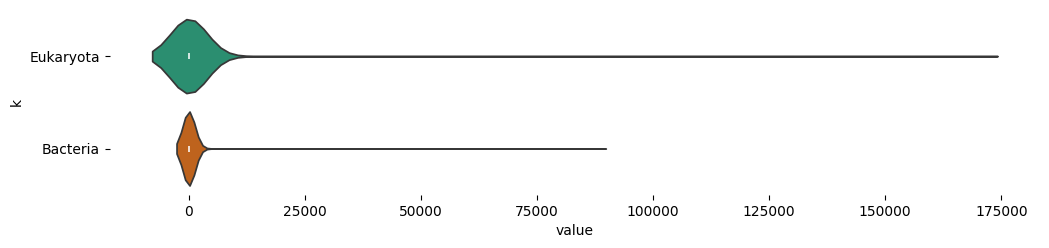

In [ ]:
# @title k vs value

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_fishidentified['k'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_fishidentified, x='value', y='k', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# prompt: Using dataframe df_fishidentified: implement something that helps to predict the type of organisms likely to be found at each water source or make correlations between the water source and type of organism found

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare the data
# Create a mapping from water source to a numerical representation
water_source_mapping = {source: i for i, source in enumerate(df_fishidentified['SiteEchantillonnage'].unique())}
df_fishidentified['water_source_encoded'] = df_fishidentified['SiteEchantillonnage'].map(water_source_mapping)

# Select features and target variable
features = ['water_source_encoded', 'Longitude(X)', 'Latitude(Y)', 'Color', 'value']
target = 'k'  # Predict the kingdom ('k') of the organism

# Handle missing values (if any)
df_fishidentified.fillna(0, inplace = True) #Replace missing values with 0, you can use more sophisticated imputation methods.

X = df_fishidentified[features]
y = df_fishidentified[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


#Example prediction:
new_water_source = 'Parc.de.la.Fabrique' # Example
new_data = pd.DataFrame([[water_source_mapping[new_water_source], -7569575547.0,4544154552.0,1, 21165]], columns=features)
predicted_kingdom = model.predict(new_data)[0]
print(f"Predicted kingdom for {new_water_source}: {predicted_kingdom}")


#Feature Importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
print(feature_importance.sort_values('Importance', ascending=False))

Accuracy: 0.69375
Predicted kingdom for Parc.de.la.Fabrique: Eukaryota
                Feature  Importance
4                 value    0.457362
2           Latitude(Y)    0.190434
1          Longitude(X)    0.177596
0  water_source_encoded    0.141651
3                 Color    0.032957
